In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Test Data/testData.csv')
df.head(20)

,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9


In [4]:
# calculate the generator gear ratio
df['gear ratio'] = df['Generator rotational speed [RPM]'] / df['Turbine rotational speed [RPM]']
df.head(20)

,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM],gear ratio
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2,15.944828
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3,15.966216
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8,15.959732
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2,16.027972
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6,16.000000
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4,15.950617
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9,15.971264
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7,15.985714
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4,16.000000
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9,15.982036


so gear ratio is 16


The max RPM is  21.0

The min RPM is  14.3


<AxesSubplot: >

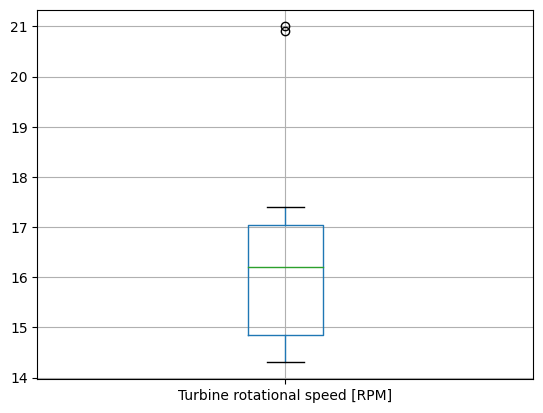

In [5]:
print('\nThe max RPM is ', max(df['Turbine rotational speed [RPM]']))
print('\nThe min RPM is ', min(df['Turbine rotational speed [RPM]']))

# show a box plot of the RPM data
df.boxplot(column=['Turbine rotational speed [RPM]'])



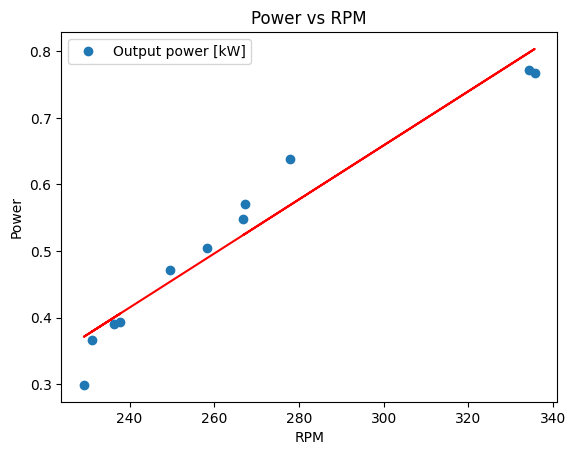

In [6]:
# plot the Power vs RPM
import matplotlib.pyplot as plt

df.plot(x='Generator rotational speed [RPM]', y='Output power [kW]', style='o')
plt.title('Power vs RPM')
plt.xlabel('RPM')
plt.ylabel('Power')

# linear regression
import numpy as np
y = np.polyfit(df['Generator rotational speed [RPM]'], df['Output power [kW]'], 1)
p = np.poly1d(y)
plt.plot(df['Generator rotational speed [RPM]'], p(df['Generator rotational speed [RPM]']), 'r-')
plt.show()

In [8]:
# import the extended data set
df2 = pd.read_csv('Test Data/testDataMore.csv')


/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_81694/3955968007.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()
/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_81694/3955968007.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


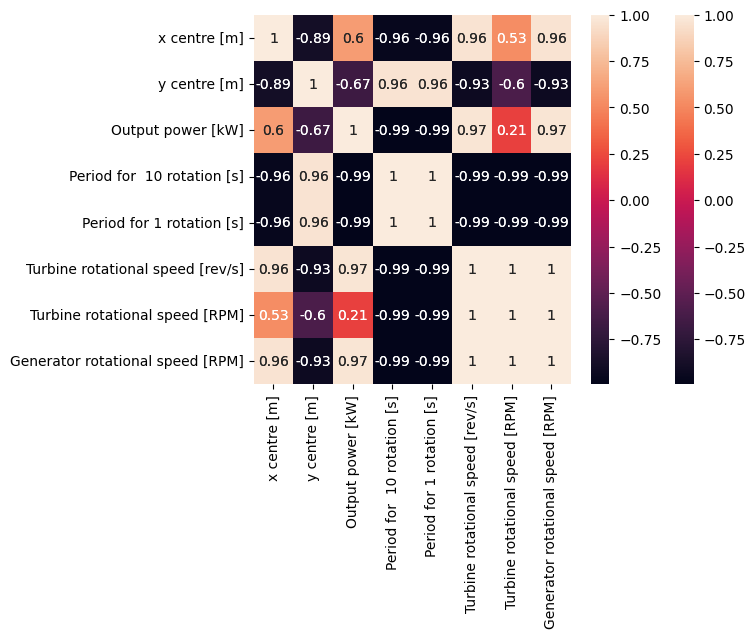

In [14]:
# Show how each variable changes for each row
import matplotlib.pyplot as plt
import seaborn as sns

# show the correlation between the variables
df2.corr()

# visiualize the correlation between the variables
sns.heatmap(df2.corr(), annot=True)
plt.show()





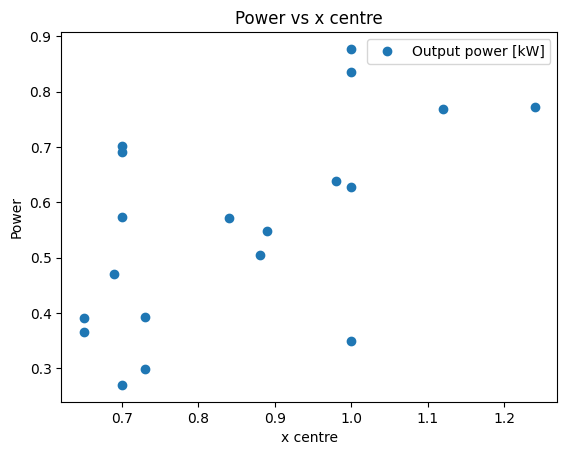

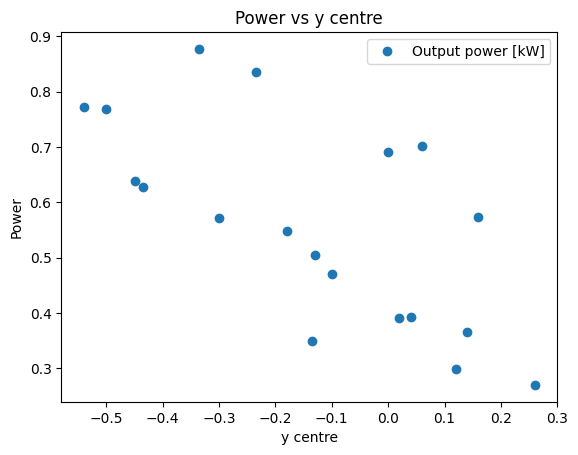

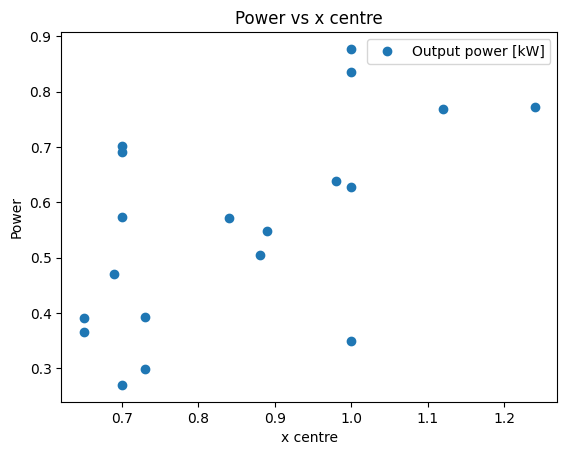

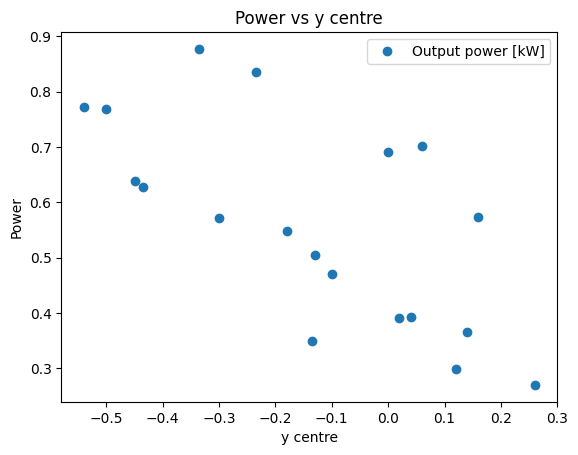

In [20]:
# plot the Power vs x centre and y centre
df2.plot(x='x centre [m]', y='Output power [kW]', style='o')
plt.title('Power vs x centre')
plt.xlabel('x centre')
plt.ylabel('Power')

df2.plot(x='y centre [m]', y='Output power [kW]', style='o')
plt.title('Power vs y centre')
plt.xlabel('y centre')
plt.ylabel('Power')

plt.show()
